# APLICACIONES DE CIENCIAS DE LA COMPUTACIÓN (INF265)
## (Segundo Semestre 2023)

## Laboratorio 2: Búsqueda sin Informacion

Indicaciones generales:

- Duración: **110 minutos (1 hora 50 minutos)**.
- **Las respuestas deben contar con un buen fundamento teórico**, se realizarán descuentos en el puntaje a respuestas que no contesten a lo solicitado.
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Debe presentar sus respuestas en base a los resultados de ejecución en los casos que se solicite. <br>**No se calificarán aquellas respuestas que no presenten un resultado de ejecución o que no concuerden con este.**
- Subir el cuadernillo con el nombre **Lab2_código.ipynb**, donde código es su código PUCP de 8 dígitos.  
- Se tomará en cuenta en la calificación el uso de comentarios relevantes.

Objetivos:
- Especificar problemas como búsquedas en espacios de estados.
- Comparar los diferentes métodos de búsqueda sin información.
- Plantear alternativas de modelos de búsqueda ante las diferentes dificultades que se puedan generar.
- Relacionar los conceptos aprendidos sobre problemas de búsqueda sin información con escenarios de la vida cotidiana.


## Caso: Ordenamiento de Sellos
Imaginemos que nos encontramos en una escuela en un país lejano, donde las notas de los alumnos se califican desde A (excelente), B (bueno), C (regular), D (falta mejorar) y F (desaprobado). Además, tenemos los caracteres especiales "O" para indicar que la evaluación del alumno fue anulada y "Z" para indicar que el alumno no asistió.

Recientemente, la escuela adquirió maquinaria nueva para automatizar el sellado de las calificaciones en las hojas de los alumnos. Existen dos máquinas para cada aula: la primera máquina revisa las notas y determina la calificación final, y luego pasa el valor de la posición de la letra como un número entero a la segunda máquina. La segunda máquina, mucho más simple, se encarga únicamente de sellar las hojas según la calificación.

La segunda máquina cuenta con un compartimiento con espacios para 8 sellos, en un compartimiento de 2x4 en donde hay 7 sellos y un componente de lectura, asumir que el módulo de lectura ocupa aproximadamente el espacio de un sello.


Para el compartimiento de la máquina 2, el módulo de entrada de datos estará en posición 𝟘 y las letras deberían estar ordenadas en **orden alfabético** en el resto de posiciones, es decir:


*   La posición 𝟙 está reservada para la letra 𝔸
*   La posición 𝟚 está reservada para la letra 𝔹
*   La posición 𝟛 está reservada para la letra ℂ
*   La posición 𝟜 está reservada para la letra 𝔻
*   La posición 𝟝 está reservada para la letra 𝔽
*   La posición 𝟞 está reservada para la letra 𝕆
*   La posición 𝟟 está reservada para la letra ℤ



Sin embargo, hay un problema. Debido a la falta de comunicación y entendimiento del personal de la escuela, los sellos fueron colocados en orden arbitrario en las aulas. Esto significa que la segunda máquina puede cometer errores y sellar una F en lugar de una A si el sello con la letra F fue colocado en la posición destinada para la A. Esto sucede porque si bien la segunda máquina recibe la posición del sello A como entrada, en el sello de la A está ubicado físicamente el sello de la F.

**Nuestro estado objetivo es tener los sellos ordenados en las posiciones correctas.**

Se ha modelado el compartimiento mediante una cadena de caracteres de longitud 8 cuyos 2 primeros elementos corresponden a la primera fila, los 2 siguientes a la segunda fila y así hasta la cuarta fila.  El carácter "+" simboliza el espacio donde la segunda máquina tiene un componente de lectura, el cual puede ser extraído para dejar un espacio libre y permitir el movimiento de los sellos.<br>

Algunas partes del código se encuentran incompletas con la palabra "COMPLETAR", por lo que deberá analizar el algoritmo y completar las partes faltantes. Las celdas con el texto **"No modificar"** no deben ser alteradas. Al final del cuadernillo se encuentra el cuestionario a responder en el presente laboratorio.
Se brindan las clases utilitarias que permitirán resolver el problema de reordenamiento.

Finalmente para esta sección se muestra un estado inicial (representado por OBD+FZCA) y el estado objetivo del compartimiento (representado por +ABCEDFOZ) :<br>

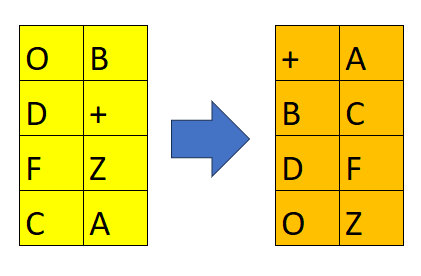

## Clase Thing

Esta clase genérica representa cualquier objeto físico que puede aparecer en un ambiente.<br>
**( No modificar )**  

In [1]:
class Thing(object):
    def is_alive(self):
        """Cosas 'vivas'deben retornar true."""
        return hasattr(self, 'alive') and self.alive

    def show_state(self):
        """Muestra el estado interno del agente. Subclases deben sobreescribir esto."""
        print("I don't know how to show_state.")

## Clase Agent

Un agente es una subclase de Thing con un slot obligatorio: <b>.program</b>, el cual almacena la función que implementa el <b>programa del agente</b>. Esta función debe tomar como argumento la <b>percepción</b> del agente y debe retornar una <b>acción</b>. La definición de Percepción y Acción depende del ambiente de trabajo (environment) donde el agente existe. El agente también puede tener el slot <b>.performance</b>, que guarda el desempeño del agente en su ambiente (desempeño visto desde el agente).<br>
**( No modificar )**

In [2]:
import collections
import random

class Agent(Thing):
    def __init__(self, program=None):
        self.alive = True
        self.performance = 0
        assert isinstance(program, collections.Callable)
        self.program = program

## Clase Environment

Esta clase abstracta representa un entorno de tareas. Clases de entornos reales heredan de esta. En un entorno típicamente se necesitará implementar 2 cosas:
<b>percept</b>, que define la percepción que el agente ve; y
<b>execute_action</b>, que define los efectos de ejecutar una acción.
El entorno mantiene una lista de .things y .agents (el cual es un subconjunto de .things). Cada elemento de .things tiene un slot .location.<br>
**( No modificar )**

In [3]:
class Environment(object):

    def __init__(self):
        self.things = []
        self.agents = []

    def thing_classes(self):
        return []  # List of classes that can go into environment

    def percept(self, agent):
        """Retorna la percepción que el agente 'agent' ve en este punto."""
        raise NotImplementedError

    def execute_action(self, agent, action):
        """El agente 'agent' ejecuta una acción 'action' en el entorno."""
        raise NotImplementedError

    def default_location(self, thing):
        """Localización por defecto para colocar una nueva cosa sin localización especificada."""
        return None

    def is_done(self):
        """Retorna True si no hay ningun agente vivo"""
        return not any(agent.is_alive() for agent in self.agents)

    def add_thing(self, thing, location=None):
        """Añade una cosa thing al entorno en la localización location.
           Si thing es un programa de agente, crea un nuevo agente con ese programa."""
        if not isinstance(thing, Thing):
            thing = Agent(thing)
        assert thing not in self.things, "No añade la misma cosa dos veces"
        thing.location = location if location is not None else self.default_location(thing)
        self.things.append(thing)
        if isinstance(thing, Agent):
            thing.performance = 0
            self.agents.append(thing)

    def step(self):
        """Ejecuta un paso del entorno (llama a los programas de los agentes, obtiene sus acciones y las ejecuta). """
        if not self.is_done():
            actions = []
            for agent in self.agents:
                if agent.alive:
                    actions.append(agent.program(self.percept(agent)))
                else:
                    actions.append("")
            for (agent, action) in zip(self.agents, actions):
                self.execute_action(agent, action)

    def run(self, steps=1000):
        """Ejecuta steps pasos en el entorno."""
        for step in range(steps):
            if self.is_done():
                return
            self.step()

## Clase CompartmentEnvironment

En esta clase se implementa el entorno del compartimiento. El caracter '+' representa la posición del mecanismo de entrada.<br>
**( No modificar )**

In [4]:
class CompartmentEnvironment(Environment):

    def __init__(self, initial_state):
        super().__init__()
        self.status = initial_state

    def thing_classes(self):
        return [CompartmentReflexAgent]

    def percept(self, agent):
        """Retorna el estado del ambiente (las piezas que estan en cada posicion)"""
        return self.status

    def execute_action(self, agent, action):
        """Implementa el MAPA De TRANSICION: Cambia la posición de los sellos de acuerdo a la acción solicitada
        del espacio libre.
        Cada acción válida debe provocar una disminución de desempeño en 1 unidad """

        ################################# COMPLETAR ###############################################

        # Debe completar las validaciones para cada acción válida
        # Recuerde que la implementación del compartimento es mediante una tupla de 8 elementos
        # en la que cada 2 elementos representa una fila.

        ###########################################################################################

        state = list(self.status)
        iblank = state.index('+')    # Obtiene el indice del casillero en blanco (representado con '+')

        if action == 'Right':
            if ((iblank + 1) % 2 != 0):
                state[iblank+1], state[iblank] = state[iblank], state[iblank+1]
                agent.performance -= 1

        elif action == 'Left':
            if (iblank % 2 != 0):
                state[iblank-1], state[iblank] = state[iblank], state[iblank-1]
                agent.performance -= 1

        elif action == 'Up':
            if (iblank > 1):
                state[iblank], state[iblank-2] = state[iblank-2], state[iblank]
                agent.performance -= 1

        elif action == 'Down':
            if (iblank < 6):
                state[iblank], state[iblank+2] = state[iblank+2], state[iblank]
                agent.performance -= 1

        self.status = ''.join(state)


    def print_state(self):

        for i in range(4):
            print(" "*20 + "|  " + self.status[2*i] + "   " + self.status[2*i+1] + "  |\n"  )



## Clase SearchProblem

Esta es una clase abstracta para definir problemas de búsqueda. Se debe hacer subclases que implementen los métodos de las acciones, resultados, test de objetivo y el costo de camino. Entonces se puede instanciar las subclases y resolverlos con varias funciones de búsqueda.<br>
**( No modificar )**

In [5]:
class SearchProblem(object):
    def __init__(self, initial, goal=None):
        """Este constructor especifica el estado inicial y posiblemente el estado(s) objetivo(s),
        La subclase puede añadir mas argumentos."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retorna las acciones que pueden ser ejecutadas en el estado dado.
        El resultado es tipicamente una lista."""
        raise NotImplementedError

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada en el estado state.
        La accion debe ser alguna de self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Retorna True si el estado pasado satisface el objetivo."""
        raise NotImplementedError

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con
        la accion action, asumiendo un costo c para llegar hasta state1.
        El metodo por defecto cuesta 1 para cada paso en el camino."""
        return c + 1

    def value(self, state):
        """En problemas de optimizacion, cada estado tiene un valor. Algoritmos
        como Hill-climbing intentan maximizar este valor."""
        raise NotImplementedError

## Clase CompartmentSearchProblem  
Esta es una subclase de SearchProblem donde se definirá concretamente el problema de búsqueda para el ambiente del compartimento. Se necesitan completar algunas validaciones para devolver los posibles movimientos.

In [39]:
class CompartmentSearchProblem(SearchProblem):

    def __init__(self, initial, goal):
        """El constructor recibe  el estado inicial y el estado objetivo"""
        self.initial = initial
        self.goal = goal


    def actions(self, state):
        """Retorna las acciones ejecutables desde el estado state.
           Recuerde que se debe retornar una LISTA de acciones, es decir, puede haber más de una acción válida
           desde un estado dado."""

        acciones = []
        iblank = state.index('+')   # Obtiene el indice del casillero en blanco (representado con '+') del estado

        ################################# COMPLETAR ###############################################

        # Debe obtener las acciones válidas para el estado dado.
        # No olvide las condiciones que se deben cumplir para que una acción sea válida.

        ###########################################################################################

        if ((iblank + 1) % 2 != 0):
            acciones.append("Right")
        if (iblank % 2 != 0):
            acciones.append("Left")
        if (iblank > 1):
            acciones.append("Up")
        if (iblank < 6):
            acciones.append("Down")

        return acciones


    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion action desde state.
        La accion debe ser alguna de self.actions(state)
        Por ejemplo, para  state='+ABCDEFOZ' y action='Right' debe retornar newState = 'A+BCDEFOZ' """

        ################################# COMPLETAR ###############################################

        # Debe completar las validaciones para cada acción válida
        # Pista: Las validaciones son las mismas que implementó en el ambiente del compartimento.

        ###########################################################################################

        iblank = state.index('+')    # obtiene el indice del casillero en blanco (representado con +) del estado
        newState = list(state)       # copia state en una lista newState

        if action == 'Right':
            if ((iblank + 1) % 2 != 0):
                newState[iblank+1], newState[iblank] = newState[iblank], newState[iblank+1]

        elif action == 'Left':
            if (iblank % 2 != 0):
                newState[iblank-1], newState[iblank] = newState[iblank], newState[iblank-1]

        elif action == 'Up':
            if (iblank > 1):
                newState[iblank-2], newState[iblank] = newState[iblank], newState[iblank-2]

        elif action == 'Down':
            if (iblank < 6):
                newState[iblank], newState[iblank+2] = newState[iblank+2], newState[iblank]

        return ''.join(newState)


    def goal_test(self, state):
        """Retorna True si state es self.goal"""
        return (self.goal == state)


    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con la acción action
        El costo del camino para llegar a state1 es c. El costo de la acción es = 1"""
        return c + 1;

## Clase Node

Estructura de datos para almacenar la información de un nodo en un <b>árbol de búsqueda</b>. Contiene información del nodo padre y el estado que representa el nodo. Tambien incluye la acción que nos llevó al presente nodo y el costo total del camino desde el nodo raíz hasta este nodo.<br>
**( No modificar )**

In [7]:
class Node:

    def __init__(self, state, parent=None, action=None, path_cost=0):
        "Crea un nodo de árbol de búsqueda, derivado del nodo parent y acción action"
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1


    def expand(self, problem):
        "Devuelve los nodos alcanzables en un paso a partir de este nodo."
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]


    def child_node(self, problem, action):
        next = problem.result(self.state, action)
        return Node(next, self, action,
                    problem.path_cost(self.path_cost, self.state, action, next))


    def solution(self):
        "Retorna la secuencia de acciones para ir de la raiz a este nodo."
        return [node.action for node in self.path()[1:]]


    def path(self):
        "Retorna una lista de nodos formando un camino de la raiz a este nodo."
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))


    def __lt__(self, node):
        return self.state < node.state


    def __eq__(self, other):
        "Este metodo se ejecuta cuando se compara nodos. Devuelve True cuando los estados son iguales"
        return isinstance(other, Node) and self.state == other.state


    def __repr__(self):
        return "<Node {}>".format(self.state)


    def __hash__(self):
        return hash(self.state)

## <b> Define una cola tipo FIFO First-In-First-Out (para BFS)</b>
**( No modificar )**

In [8]:
from collections import deque

class FIFOQueue(deque):
    """Una cola First-In-First-Out"""
    def pop(self):
        return self.popleft()

## Algoritmo general de búsqueda con memoria de nodos expandidos (Graph Search)

Algoritmo general de búsqueda ciega con memoria de estados visitados. El argumento frontier debe ser una cola vacia. Si  frontier es tipo FIFO hace busqueda en amplitud (BFS), si la frontier es una pila hará busqueda en profundidad (DFS). Devuelve el nodo solucion y una lista de nodos visitados durante la búsqueda.<br>
**( No modificar )**

In [9]:
def graph_search(problem, frontier):
    frontier.append(Node(problem.initial))
    print(problem.initial)
    explored = set()     # Memoria de estados visitados
    visited_nodes = []   # Almacena nodos visitados durante la búsqueda
    while frontier:
        node = frontier.pop()
        visited_nodes.append(node)
        if problem.goal_test(node.state):
            return node, visited_nodes
        explored.add(node.state)

        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
    return None

## Clase que implementa el programa del agente de búsqueda en el entorno del compartimento
**( No modificar )**

In [10]:
class CompartmentSearchProgram:
    def __init__(self, goal_state, search_method):
        self.goal = goal_state
        self.method = search_method
        self.seq = []  # Lista de acciones a ejecutar, inicialmente vacía.

    def __call__(self, percept):
        state = percept
        if state == self.goal:    # Si el ambiente se encuentra en el estado objetivo, no hace nada.
            return 'None'

        if not self.seq:          # Si la lista de acciones esta vacía.

            print('- El agente buscará una solución al problema del ordenamiento de sellos:\n  Estado Inicial  = {}\n  Estado Objetivo = {}'.format(state,self.goal))

            search_problem = CompartmentSearchProblem(state, self.goal)

            if self.method == 'bfs':
                print(search_problem)
                goal_node, visited_nodes = graph_search(search_problem, FIFOQueue()) # Frontera es una cola FIFO

            elif self.method == 'dfs':
                goal_node, visited_nodes = graph_search(search_problem, []) # Frontera es una pila

            else:
                raise NotImplementedError

            if goal_node == None: # No se encuentra solución
                print('  No se encontró solución para el problema del ordenamiento de sellos con método {}\n'
                      .format(self.method) )
                return 'None'

            self.seq = goal_node.solution()

            print('  Agente planeó una solución al problema del ordenamiento de sellos con {}:\n  Secuencia de acciones = {}\n  Nodos visitados = {}\n  Costo Solución  = {}\n'
                  .format(self.method, self.seq, len(visited_nodes), goal_node.path_cost) )

        action = self.seq.pop(0)

        return action

## Probando el entorno de parqueo vehicular y agente de búsqueda
A continuación se brinda código referencial para probar y visualizar los resultados.<br>

**Este código podrá ser reutilizado posteriormente para las pruebas donde se requiera probar algún método de búsqueda.** <br>

**IMPORTANTE:** Recuerde instanciar todos los objetos necesarios para cada prueba.

In [11]:
collections.Callable = collections.abc.Callable

In [40]:
# ========================================================
#                     Prueba para BFS
# ========================================================

"""Crea el entorno del problema del ordenamiento de sellos con el adecuado estado inicial."""
e = CompartmentEnvironment("OBD+FZCA")

"""Crea un agente de busqueda para alcanzar goalstate"""
goalstate = "+ABCDFOZ"
a = Agent( CompartmentSearchProgram (goalstate, 'bfs') )

print("-"*50)
print("Estado inicial del ambiente del compartimento:")
print("-"*50 + "\n")
e.print_state()
print("-"*80 + "\n")

"""Añade el agente creado al entorno"""
e.add_thing(a)

# Ejecuta el entorno 30 pasos
e.run(30)

print("-"*80)
print("Estado final del ambiente del compartimento:")
print("-"*50 + "\n")
e.print_state()

--------------------------------------------------
Estado inicial del ambiente del compartimento:
--------------------------------------------------

                    |  O   B  |

                    |  D   +  |

                    |  F   Z  |

                    |  C   A  |

--------------------------------------------------------------------------------

- El agente buscará una solución al problema del ordenamiento de sellos:
  Estado Inicial  = OBD+FZCA
  Estado Objetivo = +ABCDFOZ
OBD+FZCA
  Agente planeó una solución al problema del ordenamiento de sellos con bfs:
  Secuencia de acciones = ['Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Up']
  Nodos visitados = 13215
  Costo Solución  = 24

--------------------------------------------------------------------------------
Estado final del ambiente del compartimento:
---------------------------------------

## Cuestionario

**1.** Completar el código faltante con las etiquetas **"COMPLETAR"** en las clases CompartmentEnviroment, CompartmentSearchProblem. **(4 ptos)** <br>

**Rpta:** Ya está completado en la parte de arriba, solo se tenia que  completar los movimientos segun el indice del '+'

**2.** Identifique en el código el programa del agente, es decir, ubique y responda donde es que está dicho método. ¿Que información le brinda el entorno al agente? ¿Cómo reacciona el agente a esta información?. Fundamente si el agente actúa racionalmente al entorno y si este comportamiento asegura que maximice su medida de desempeño. **(4 puntos)** <br>

**Rpta:** El uso del metodo esta en graph_search y dependiendo si usamos 'bfs' se hace por cola, osea una busqueda por amplitud. En cambio si se usa 'dfs' se utiliza una pila y se hace busqueda por profundidad.
El entorno le brinda al agente un estado de la forma "ABC+FDZO", a este estado se le aplica una accion segun las condiciones y revisando si ese estado no esta visitado.
El agente se podria decir que actua racionalmente ya que nota que estados ha visitado para no caer en bucle.


**3.**  ¿Por qué la representacion de estado elegida para este problema (string de caracteres) se puede considerar como una representación estructurada del ambiente? Justifique  **(2 punto)**


**Rpta:** Ya que podemos notar que un estado esta correctamente representado además se puede observar todo el entorno mediante un estado, ademas es facil de entender el estado ya qeu esta representado en un simple arreglo


**4.** Cree una función para poder ejecutar el programa de manera compacta. Y pruébela para los métodos DFS y BFS. Esta funcion puede asumir que los parámetros que se le pasan son siempre correctos, la función vacía esta aquí. Se está considerando que el estado inicial es OBD+FZCA y el estado objetivo es +ABCDFOZ **(2 punto)**:

In [41]:
def runProgram(initialstate, goalstate, numsteps, method):
  e = CompartmentEnvironment(initialstate)
  a = Agent( CompartmentSearchProgram (goalstate, method) )
  print("-"*50)
  print("Estado inicial del ambiente del compartimento:")
  print("-"*50 + "\n")
  e.print_state()
  print("-"*80 + "\n")
  e.add_thing(a)
  e.run(numsteps)
  print("-"*80)
  print("Estado final del ambiente del compartimento:")
  print("-"*50 + "\n")
  e.print_state()
  pass #No hace nada, sirve para indicar que la función termino

In [42]:
#Llamado a la funcion con DFS:
runProgram(initialstate="OBD+FZCA", goalstate="+ABCDFOZ", numsteps=1000000, method='dfs')

--------------------------------------------------
Estado inicial del ambiente del compartimento:
--------------------------------------------------

                    |  O   B  |

                    |  D   +  |

                    |  F   Z  |

                    |  C   A  |

--------------------------------------------------------------------------------

- El agente buscará una solución al problema del ordenamiento de sellos:
  Estado Inicial  = OBD+FZCA
  Estado Objetivo = +ABCDFOZ
OBD+FZCA
  Agente planeó una solución al problema del ordenamiento de sellos con dfs:
  Secuencia de acciones = ['Down', 'Down', 'Left', 'Up', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'R

In [43]:
#Llamado a la funcion con BFS:
runProgram(initialstate="OBD+FZCA", goalstate="+ABCDFOZ", numsteps=50, method='bfs')

--------------------------------------------------
Estado inicial del ambiente del compartimento:
--------------------------------------------------

                    |  O   B  |

                    |  D   +  |

                    |  F   Z  |

                    |  C   A  |

--------------------------------------------------------------------------------

- El agente buscará una solución al problema del ordenamiento de sellos:
  Estado Inicial  = OBD+FZCA
  Estado Objetivo = +ABCDFOZ
OBD+FZCA
  Agente planeó una solución al problema del ordenamiento de sellos con bfs:
  Secuencia de acciones = ['Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Up']
  Nodos visitados = 13215
  Costo Solución  = 24

--------------------------------------------------------------------------------
Estado final del ambiente del compartimento:
---------------------------------------

# Analisis de resultados

**5.** ¿Cuál método encuentra la secuencia de acciones más corta? ¿Por qué? **(2 punto)**

**Rpta:** El método que encuentra la secuencia de acciones más corta es el 'bfs' ya que al ser una búsqueda por amplitud , revisa por niveles encontrando la solución más corta

**6.** ¿Algún método garantiza optimalidad (osea, encuentra la solucion con la menor cantidad de acciones posible)? Justifique. **(2 punto)**    

**Rpta:** El metodo 'bfs' garantiza optimabilidad, ya que encontrara la solución mas corta

**7.** Revise la clase **CompartmentSearchProblem**, considerando que para realizar un movimiento es requerido intercambiar dos sellos, se tiene un tablero 2x4, para intercambiar dos sellos es requerido de cierta cantidad de aceite y que, **el costo de camino total es numéricamente igual al precio en centavos de dolar gastados en onzas de aceite**, ¿cuáles son los valores **b** y **d** del árbol de busqueda? **(2 punto)**

**Rpta:** Los valores b serian la cantidad de posibles movimientos, de los que parten nuevos nodos hijos, y d seria la profundidad de la solución mas corta. En el caso de 'bfs' si se sabe, en 'dfs' no. Lo más optimo para reducir el costo seria usar un metodo 'bfs'

**8.** Si se cuenta con memoria muy limitada, ¿cuál sería la opción recomendable a usarse? ¿Por qué? **(1 punto)**

**Rpta:** La opcion más recomendable en este paso sería usar 'dfs' ya que pese la complejidad de bfs revisa todo el "nivel" y este proceso crece exponencialmente, llenando de daos la memoria muy rapido. Mientras que usando 'dfs' se va por menores datos y se llena menos la memoria, pero la solucion es más larga

**9.** Se ha estado trabajando con búsqueda de grafo. ¿cuál sería el valor **m** del árbol de búsqueda si se estuviera usando búsqueda de árbol (sin memoria de estados no visitados) ? **(1 punto)**

**Rpta:** Hubiera sido infinito ya que si no existe la memoria de estados visitados, se volveria a un estado ya visitado y se crearía un bucle interminable